<a href="https://colab.research.google.com/github/ZijianDu/C-in-C-KPI/blob/main/KPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-variates Regression: Smart KPI for Circle-in-Circle module

## data loading, examination, train-test split

In [171]:
import pandas as pd
import numpy as np
# main ML framework
import sklearn
import csv
# mount drive for data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [172]:
df_down = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ellipse/down.csv")
del df_down['Unnamed: 35']
df_down.head(10)

,index,small_cx,small_cy,small_a,small_b,small_angle,small_cx_gt,small_cy_gt,small_a_gt,small_b_gt,...,3*stdInner,3*stdOuter,st.dev.from EllipseInner,st.dev.from EllipseOuter,avGradInner_to_max,avGradOuter_to_max,sigmaGradInner,sigmaGradOuter,innerGoodPixels,outerGoodPixels
0,1,155.490952,224.847855,58.643986,41.830204,86.159714,153.204689,186.961125,29.451965,31.596504,...,15.209413,22.267916,6.887875,8.938169,0.248290,0.247781,0.191274,0.225836,0.385783,0.164375
1,2,311.334229,225.160049,59.150776,44.367500,86.768188,309.204689,186.961125,30.129956,31.221591,...,14.465426,33.107399,6.270432,13.095271,0.247592,0.274293,0.191738,0.217389,0.371009,0.158120
2,3,467.574524,223.574295,59.321507,42.315926,85.799232,465.204689,186.961125,30.787500,32.172203,...,14.142763,35.690300,6.200739,14.468878,0.249610,0.276901,0.196715,0.223948,0.436336,0.186164
3,4,623.546143,224.731659,59.327309,42.463478,85.744385,621.204689,186.961125,30.400091,30.569618,...,12.030594,35.577065,5.524440,13.486585,0.238429,0.284357,0.185637,0.212927,0.379924,0.171081
4,5,778.940613,223.551132,59.024612,41.705078,87.129601,777.204689,186.961125,30.930906,32.842299,...,16.115751,20.899221,7.290905,8.957928,0.253485,0.267439,0.196682,0.234504,0.424137,0.179873
5,6,935.166382,223.583557,57.807800,40.992836,86.468277,933.204689,186.961125,30.807192,31.443806,...,16.144447,28.489460,7.410555,10.937725,0.231514,0.272197,0.183952,0.230711,0.408004,0.210214
6,7,1090.486328,227.439636,54.446888,41.258221,79.483452,1089.204689,186.961125,31.823507,31.999490,...,27.752071,30.315578,10.990743,12.000064,0.217117,0.281568,0.178638,0.235895,0.376239,0.159410
7,8,1247.027588,224.093079,60.517635,42.398586,86.283485,1245.204689,186.961125,31.470730,32.096012,...,12.463970,33.126427,5.581203,13.031818,0.245676,0.296539,0.199806,0.221421,0.412115,0.186876
8,9,1403.798218,223.870132,59.823879,41.884865,87.738548,1401.204689,186.961125,32.279191,33.701474,...,22.674829,27.077620,9.183358,10.625536,0.239462,0.294285,0.183290,0.221894,0.439000,0.208487
9,10,1559.762207,223.044418,59.208115,41.415028,87.436493,1557.204689,186.961125,32.717153,33.003129,...,18.078928,24.562725,8.261108,9.828841,0.224171,0.293125,0.182768,0.225609,0.449488,0.228635


In [173]:
# generate: small_e_gt, large_e_gt, small_e_features, large_e_features, small_e_IoU, large_e_IoU
all_columns = df_down.columns
print("all Columns")
print(all_columns)
small_ellipse_gt_columns = list(all_columns[1:11])
small_e_gt = df_down[small_ellipse_gt_columns]
small_e_target = df_down['IoU_small']
large_ellipse_gt_columns = list(all_columns[12:22])
large_e_gt = df_down[large_ellipse_gt_columns]
large_e_target = df_down['IoU_large']

print("all Features")
small_e_features_columns = all_columns[23::2]
print(small_e_features_columns)
small_e_features = df_down[small_e_features_columns.to_list()]
large_e_features_columns = all_columns[24::2]
large_e_features = df_down[large_e_features_columns.to_list()]

all Columns
Index(['index', 'small_cx', 'small_cy', 'small_a', 'small_b', 'small_angle',
       'small_cx_gt', 'small_cy_gt', 'small_a_gt', 'small_b_gt',
       'small_angle_gt', 'IoU_small', 'large_cx', 'large_cy', 'large_a',
       'large_b', 'large_angle', 'large_cx_gt', 'large_cy_gt', 'large_a_gt',
       'large_b_gt', 'large_angle_gt', 'IoU_large', 'FitConfidenceInner',
       'FitConfidenceOuter', '3*stdInner', '3*stdOuter',
       'st.dev.from EllipseInner', 'st.dev.from EllipseOuter',
       'avGradInner_to_max', 'avGradOuter_to_max', 'sigmaGradInner',
       'sigmaGradOuter', 'innerGoodPixels', 'outerGoodPixels'],
      dtype='object')
all Features
Index(['FitConfidenceInner', '3*stdInner', 'st.dev.from EllipseInner',
       'avGradInner_to_max', 'sigmaGradInner', 'innerGoodPixels'],
      dtype='object')


In [174]:
# train test split
from sklearn.model_selection import train_test_split 
curr_seed = 1
test_ratio = 0.25
small_e_train, small_e_test, small_e_gt_train, small_e_gt_test, small_e_IoU_train, small_e_IoU_test = train_test_split(
    small_e_features, small_e_gt, small_e_target, shuffle = True, test_size = test_ratio, random_state = curr_seed)
large_e_train, large_e_test, large_e_gt_train, large_e_gt_test, large_e_IoU_train, large_e_IoU_test = train_test_split(
    large_e_features, large_e_gt, large_e_target, shuffle = True, test_size = test_ratio, random_state = curr_seed)

## data standardization

### standardize all feature columns with standardscaler
### standardize IoU with minmax scaler min:0 max:1, no need to standardize GT

In [175]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# set min to 0.01 s.t some algo with range constraints can run
minmax = MinMaxScaler(feature_range=(0.01, 1))
stdscaler = StandardScaler()
# standardize all featuress
def standardize(small_e_features_, large_e_features_, small_e_target_, large_e_target_, stdscaler, minmax):
  small_e_features_normalized_ = pd.DataFrame(stdscaler.fit_transform(small_e_features_), columns = small_e_features_columns)
  large_e_features_normalized_ = pd.DataFrame(stdscaler.fit_transform(large_e_features_), columns = large_e_features_columns)
  small_e_target_normalized_ = pd.DataFrame(minmax.fit_transform(np.array(small_e_target_.values).reshape(-1, 1)), columns = ['IoU_small'] )
  large_e_target_normalized_ = pd.DataFrame(minmax.fit_transform(np.array(large_e_target_.values).reshape(-1, 1)), columns = ['IoU_large'] )
  return small_e_features_normalized_, large_e_features_normalized_, small_e_target_normalized_, large_e_target_normalized_


### standardize training and testing data separately to prevent data leak

In [176]:
# normalize training data
small_e_train_features_normalized, large_e_train_features_normalized, small_e_train_target_normalized, large_e_train_target_normalized = standardize(
    small_e_train, large_e_train, small_e_IoU_train, large_e_IoU_train, stdscaler, minmax)

# normalize testing data
small_e_test_features_normalized, large_e_test_features_normalized, small_e_test_target_normalized, large_e_test_target_normalized = standardize(
    small_e_test, large_e_test, small_e_IoU_test, large_e_IoU_test, stdscaler, minmax)

## feature exploration on training dataset: small and large ellipses

### Visualize feature correlation for small ellipse, dot size reflect IoU value.
### yellow&bigger dots are high IoU values, blue&smaller dots are low IoU values
### several feature combination can effective separate the two clusters

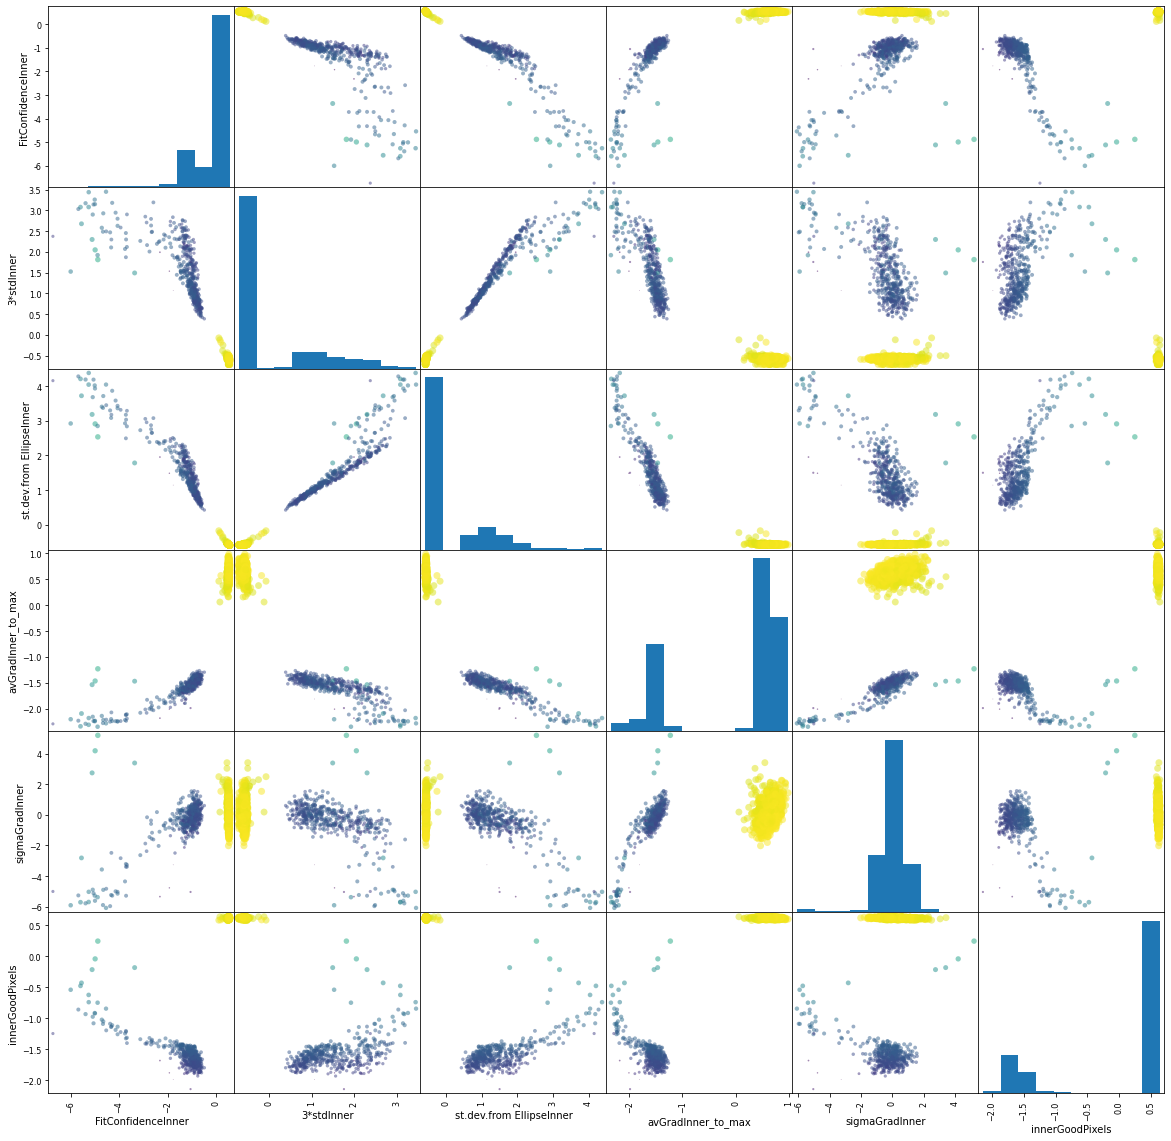

In [177]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
dot_scale_factor = 200
pd.plotting.scatter_matrix(small_e_train_features_normalized, c = small_e_train_target_normalized.values, 
                           figsize = (20, 20),  s = dot_scale_factor * small_e_train_target_normalized.values)
plt.show()

### Visualize feature correlation for large ellipse, dot size reflect IoU value
### harder to separate the bigger dots from smaller dots

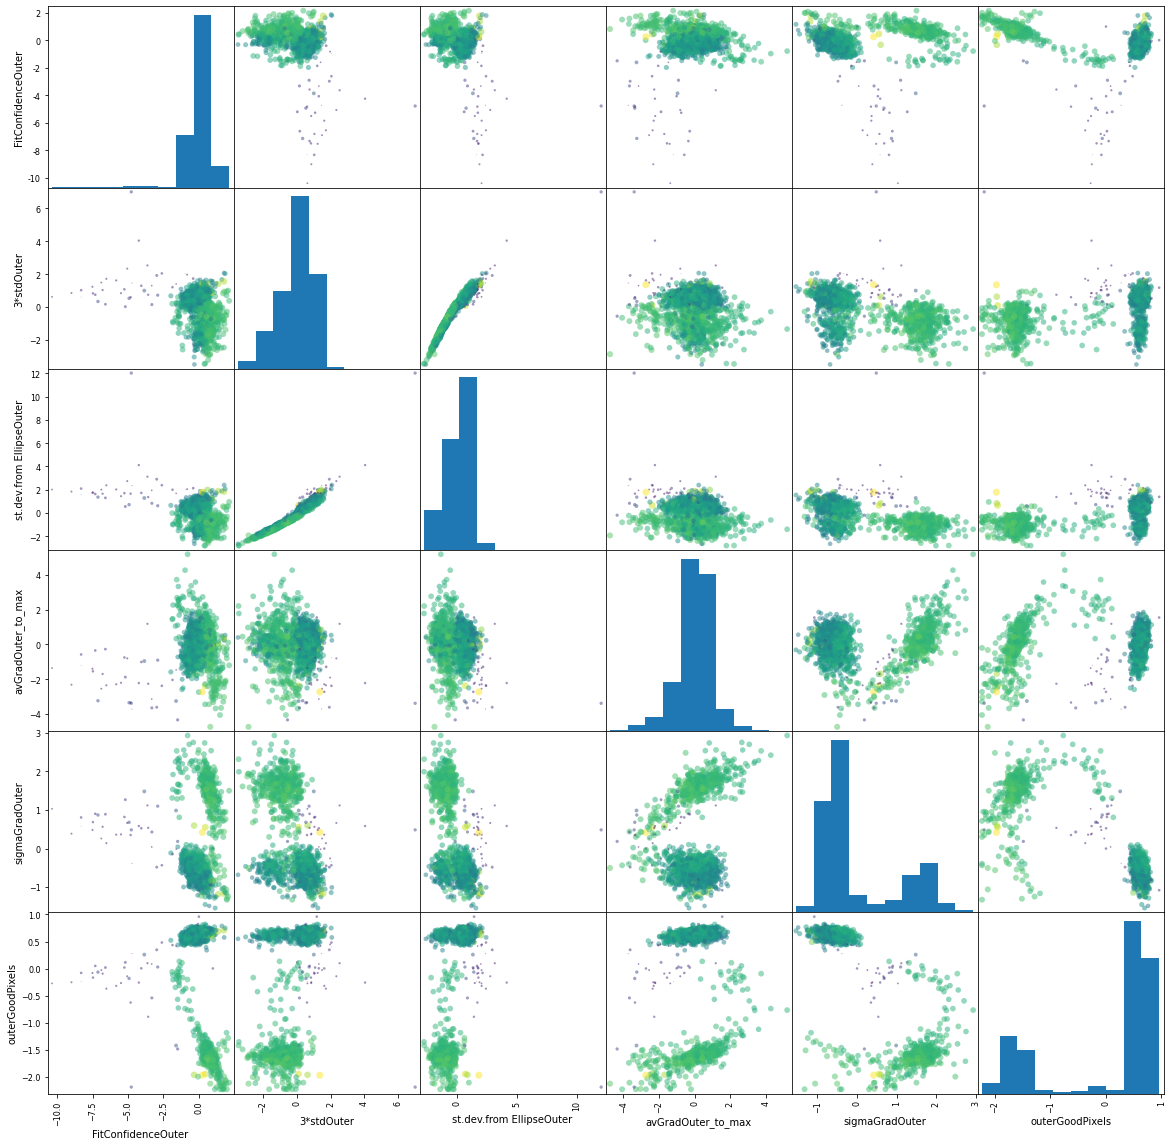

In [178]:
pd.plotting.scatter_matrix(large_e_train_features_normalized, c = large_e_train_target_normalized.values, 
                           figsize = (20, 20),  s = dot_scale_factor * large_e_train_target_normalized.values)
plt.show()

### examine distribution of IoU for small and large ellipses

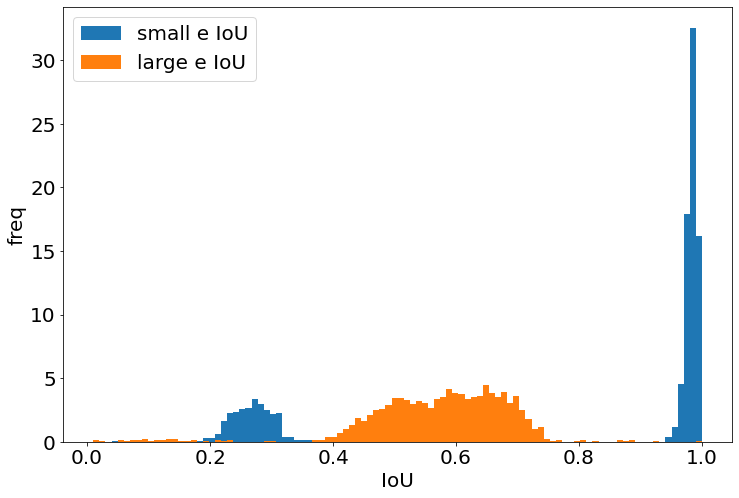

In [179]:
plt.figure(figsize = (12, 8))
_bins = 100
_fontsize = 20
plt.xticks(fontsize = _fontsize)
plt.yticks(fontsize = _fontsize)
plt.hist(small_e_train_target_normalized.values, bins = _bins, label = 'small e IoU', density = True)
plt.hist(large_e_train_target_normalized.values, bins = _bins, label = "large e IoU", density = True)
plt.xlabel("IoU", fontsize = _fontsize)
plt.ylabel("freq", fontsize = _fontsize)
plt.legend(fontsize = _fontsize)
plt.show()

## GENERAL FLOW: cross validation for hyperparameter tuning/optimization, performance evaluation on test set using MAE, MSE, R squared



### Model group 1: LINEAR MODELS

In [180]:
# use a dict to save model performance 
performance_small_e = {}
performance_large_e = {}
prediction_small_e = {}
prediction_large_e = {}
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error
# Python function as value
metric_list = {'R2_score': r2_score, 'median_absolute_error': median_absolute_error, 'mean_squared_error': mean_squared_error}

In [189]:
# function to calculate and add results to performance dict
def performance_eval_save(metric_list, _y_pred_small, _small_e_test_target_normalized, _y_pred_large, _large_e_test_target_normalized,
                          _performance_small_e, _performance_large_e, _prediction_small_e, _prediction_large_e, method, flag):
  _performance_small_e[method] = {}
  _performance_large_e[method] = {}
  _prediction_small_e[method] = _y_pred_small.flatten()
  _prediction_large_e[method] = _y_pred_large.flatten()
  for name, metric in metric_list.items():
    value_small = metric(_y_pred_small, _small_e_test_target_normalized)
    value_large = metric(_y_pred_large, _large_e_test_target_normalized)
    _performance_small_e[method][name] = value_small
    _performance_large_e[method][name] = value_large
  if flag == 1:
    print(performance_small_e)
    print(performance_large_e)

In [190]:
### OLS
from sklearn import linear_model
OLS = linear_model.LinearRegression()
# small_e_train_features_normalized, large_e_train_features_normalized, small_e_train_target_normalized, large_e_train_target_normalized
OLS.fit(small_e_train_features_normalized, small_e_train_target_normalized)
OLS.fit(large_e_train_features_normalized, large_e_train_target_normalized)
y_pred_small = OLS.predict(small_e_test_features_normalized)
y_pred_large = OLS.predict(large_e_test_features_normalized)

# call eval function
performance_eval_save(metric_list, y_pred_small, small_e_test_target_normalized, y_pred_large, large_e_test_target_normalized,
                      performance_small_e, performance_large_e, prediction_small_e, prediction_large_e, "OLS", 1)

{'OLS': {'R2_score': -8.434834632049098, 'median_absolute_error': 0.34895450001249484, 'mean_squared_error': 0.11596531083683448}}
{'OLS': {'R2_score': 0.18334487177094339, 'median_absolute_error': 0.03850163259321271, 'mean_squared_error': 0.006473793927019574}}


In [191]:
## Ridge regression w. parameter tuning w. 5 folds CV
Ridge = linear_model.RidgeCV(alphas = np.logspace(-10, 10, 100), cv = 5)
Ridge.fit(small_e_train_features_normalized, small_e_train_target_normalized)
print("best alpha for small e")
print(Ridge.alpha_)
y_pred_small = Ridge.predict(small_e_test_features_normalized)

best alpha for small e
0.019179102616724848


In [192]:
Ridge.fit(large_e_train_features_normalized, large_e_train_target_normalized)
print("best alpha for large e")
print(Ridge.alpha_)
y_pred_large = Ridge.predict(large_e_test_features_normalized)

best alpha for large e
8.111308307896856


In [193]:
performance_eval_save(metric_list, y_pred_small, small_e_test_target_normalized, y_pred_large, large_e_test_target_normalized,
                      performance_small_e, performance_large_e, prediction_small_e, prediction_large_e, "Ridge", 1)

{'OLS': {'R2_score': -8.434834632049098, 'median_absolute_error': 0.34895450001249484, 'mean_squared_error': 0.11596531083683448}, 'Ridge': {'R2_score': 0.9986210203732345, 'median_absolute_error': 0.00784370613243146, 'mean_squared_error': 0.0001411081891163867}}
{'OLS': {'R2_score': 0.18334487177094339, 'median_absolute_error': 0.03850163259321271, 'mean_squared_error': 0.006473793927019574}, 'Ridge': {'R2_score': 0.1578404566254099, 'median_absolute_error': 0.039692108036342266, 'mean_squared_error': 0.006427938785316447}}


In [194]:
## elastic net using 5. fold CV
Elastic = linear_model.ElasticNetCV(cv = 5, random_state = 0, verbose = 1, max_iter = 3000)
Elastic.fit(small_e_train_features_normalized, small_e_train_target_normalized)
print("\n")
print("best hyperparams for small e")
print(Elastic.alpha_, Elastic.intercept_)
y_pred_small = Elastic.predict(small_e_test_features_normalized)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.................................................................................................................................................................................................................................................................................................................................



best hyperparams for small e
0.0006395796816305368 0.7836718564476016


...................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [195]:
Elastic.fit(large_e_train_features_normalized, large_e_train_target_normalized)
print("\n")
print("best hyperparams for large e")
print(Elastic.alpha_, Elastic.intercept_)
y_pred_large = Elastic.predict(large_e_test_features_normalized)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.........................................................................................................................................................................................................................................................................................................................................................................................................



best hyperparams for large e
0.0015555282346165725 0.575100825195624


...........................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [196]:
performance_eval_save(metric_list, y_pred_small, small_e_test_target_normalized, y_pred_large, large_e_test_target_normalized,
                      performance_small_e, performance_large_e, prediction_small_e, prediction_large_e, "Elastic", 1)

{'OLS': {'R2_score': -8.434834632049098, 'median_absolute_error': 0.34895450001249484, 'mean_squared_error': 0.11596531083683448}, 'Ridge': {'R2_score': 0.9986210203732345, 'median_absolute_error': 0.00784370613243146, 'mean_squared_error': 0.0001411081891163867}, 'Elastic': {'R2_score': 0.9983662719412991, 'median_absolute_error': 0.008014639811376734, 'mean_squared_error': 0.00016694670252966875}}
{'OLS': {'R2_score': 0.18334487177094339, 'median_absolute_error': 0.03850163259321271, 'mean_squared_error': 0.006473793927019574}, 'Ridge': {'R2_score': 0.1578404566254099, 'median_absolute_error': 0.039692108036342266, 'mean_squared_error': 0.006427938785316447}, 'Elastic': {'R2_score': 0.13162898016923041, 'median_absolute_error': 0.04091708650841919, 'mean_squared_error': 0.006354964655657721}}


In [198]:
# generalized linear model extend linear models in two ways: predicted value y are linked to a linear combination of input variables via inverse link function, 
# squared loss function is replaced by unit deviance d of a distribution in the exponential family (reproductive exponential dispersion model) y(w, x) = h(Xw)
Tweedies = []
Tweedies_names = ["GLM0", "GLM1", "GLM2", "GLM3"]
for _power in range(4):
  Tweedies.append(linear_model.TweedieRegressor(power = _power,  alpha = 0.5, link = 'log'))
counter = 0
# small and large e
for tweedie, name in zip(Tweedies, Tweedies_names):
  counter += 1
  tweedie.fit(small_e_train_features_normalized, small_e_train_target_normalized)
  y_pred_small = tweedie.predict(small_e_test_features_normalized)
  tweedie.fit(large_e_train_features_normalized, large_e_train_target_normalized)
  y_pred_large = tweedie.predict(large_e_test_features_normalized)
  if counter == 4:
    performance_eval_save(metric_list, y_pred_small, small_e_test_target_normalized, y_pred_large, large_e_test_target_normalized,
                      performance_small_e, performance_large_e, prediction_small_e, prediction_large_e, name, 1)
  else:
    performance_eval_save(metric_list, y_pred_small, small_e_test_target_normalized, y_pred_large, large_e_test_target_normalized,
                      performance_small_e, performance_large_e, prediction_small_e, prediction_large_e, name, 0)

{'OLS': {'R2_score': -8.434834632049098, 'median_absolute_error': 0.34895450001249484, 'mean_squared_error': 0.11596531083683448}, 'Ridge': {'R2_score': 0.9986210203732345, 'median_absolute_error': 0.00784370613243146, 'mean_squared_error': 0.0001411081891163867}, 'Elastic': {'R2_score': 0.9983662719412991, 'median_absolute_error': 0.008014639811376734, 'mean_squared_error': 0.00016694670252966875}, 'GLM0': {'R2_score': 0.8076205890856885, 'median_absolute_error': 0.042773090395134106, 'mean_squared_error': 0.010472469691359006}, 'GLM1': {'R2_score': 0.9084774515925306, 'median_absolute_error': 0.04900291723220773, 'mean_squared_error': 0.0061104873324247825}, 'GLM2': {'R2_score': 0.9425086473855332, 'median_absolute_error': 0.05638534433122788, 'mean_squared_error': 0.004341079784333182}, 'GLM3': {'R2_score': 0.9498230098824659, 'median_absolute_error': 0.05989274869961414, 'mean_squared_error': 0.004048621175954926}}
{'OLS': {'R2_score': 0.18334487177094339, 'median_absolute_error': 

#### predicted IoU vs. ground truth for one model: GLM3

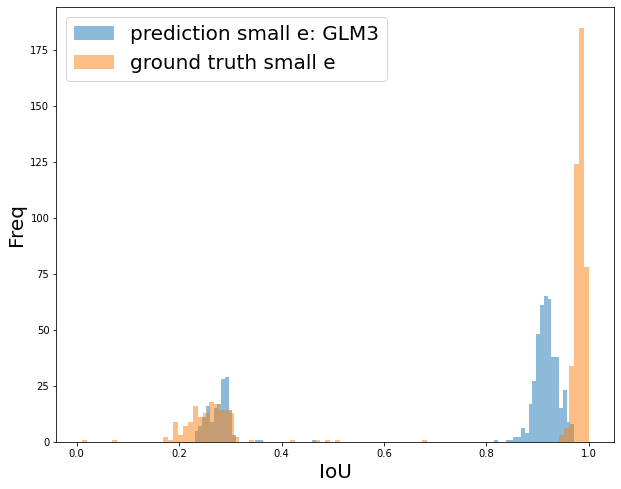

In [221]:
plt.figure(figsize = (10, 8))
_fontsize = 20
_alpha = 0.5
plt.xlabel("IoU", fontsize = _fontsize)
plt.ylabel("Freq", fontsize = _fontsize)
plt.hist(prediction_small_e['GLM3'], bins = 100, label = "prediction small e: GLM3", alpha = _alpha)
plt.hist(small_e_test_target_normalized.values.flatten(), bins = 100, label = 'ground truth small e', alpha = _alpha)
plt.legend(fontsize = _fontsize)
plt.show()

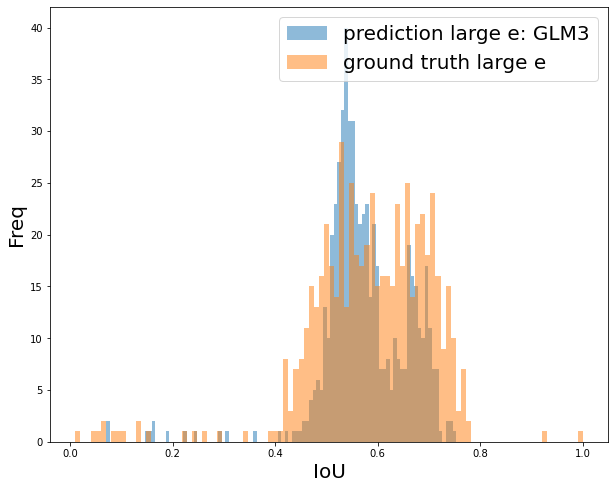

In [222]:
plt.figure(figsize = (10, 8))
_fontsize = 20
_alpha = 0.5
plt.xlabel("IoU", fontsize = _fontsize)
plt.ylabel("Freq", fontsize = _fontsize)
plt.hist(prediction_large_e['GLM3'], bins = 100, label = "prediction large e: GLM3", alpha = _alpha)
plt.hist(large_e_test_target_normalized.values.flatten(), bins = 100, label = 'ground truth large e', alpha = _alpha)
plt.legend(fontsize = _fontsize)
plt.show()

## More models and more in-depth performance analysis to follow....